In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the generator model
generator_model = load_model('/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Generator_Epochs/generator_model_epoch_140.h5')

# Define the input and output shapes of the generator
input_shape = (32, 32, 3)
output_shape = (128, 128, 3)

# Define the path to the folder with the 32x32x3 images
data_path = '/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Data/Downsized_32x32x3'

# Define the path to the folder to save the 128x128x3 images
output_path = '/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Data/Upsized_128x128x3'

# Define a function to resize an image using the generator model
def resize_image(img):
    # Scale the pixel values to the range [-1, 1]
    img = img / 127.5 - 1.
    
    # Add a batch dimension to the image
    img = np.expand_dims(img, axis=0)
    
    # Generate the high-resolution image from the low-resolution image
    img_hr = generator_model.predict(img)[0]
    
    # Scale the pixel values back to the range [0, 255]
    img_hr = (img_hr + 1) * 127.5
    
    # Convert the pixel values to integers
    img_hr = img_hr.astype(np.uint8)
    
    return img_hr

# Loop over the subfolders in the data folder
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    
    # Create the output folder if it does not exist
    output_folder = os.path.join(output_path, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop over the subfolders in the current folder
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        # Create the output subfolder if it does not exist
        output_subfolder = os.path.join(output_folder, subfolder)
        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)
        
        # Loop over the images in the current subfolder
        for filename in os.listdir(subfolder_path):
            filepath = os.path.join(subfolder_path, filename)
            
            # Load the low-resolution image
            img_lr = cv2.imread(filepath)
            
            # Resize the image using the generator
            img_hr = resize_image(img_lr)
            
            # Save the high-resolution image in the output folder
            output_filename = os.path.join(output_subfolder, filename)
            cv2.imwrite(output_filename, img_hr)

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the image size and the number of classes
img_size = 128
num_classes = 2

# Define the train and test directories
train_dir = r"/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Data/Upsized_128x128x3/train"
test_dir = r"/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Data/Upsized_128x128x3/test"

# Define the classes
classes = ['DME', 'DRUSEN']

# Create empty lists to store the data and labels
train_data = []
train_labels = []
test_data = []
test_labels = []

# Loop through the train directory to get the images and labels
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_size, img_size))
        train_data.append(image)
        train_labels.append(class_index)

# Loop through the test directory to get the images and labels
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_size, img_size))
        test_data.append(image)
        test_labels.append(class_index)

# Convert the data and labels to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=num_classes)
val_labels = to_categorical(val_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

2023-03-22 18:58:17.840387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 18:58:17.915466: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-22 18:58:18.326775: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jsmith/miniconda3/envs/tf/lib/python3.10/site-packages/cv2/../../lib64::/home/jsm

In [2]:
print(train_data[1].shape)

(128, 128, 3)


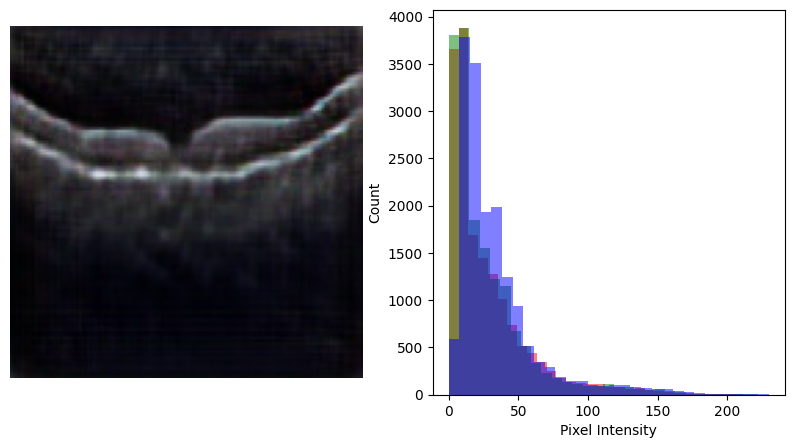

In [4]:
import matplotlib.pyplot as plt

def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    
plotHistogram(train_data[1])

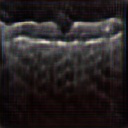

File: DME-3157783-53.jpeg Directory: train/DME Pixel size: (128, 128)


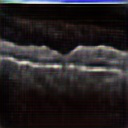

File: DME-4759696-5.jpeg Directory: train/DME Pixel size: (128, 128)


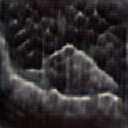

File: DME-6737988-57.jpeg Directory: train/DME Pixel size: (128, 128)


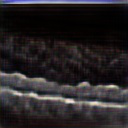

File: DME-3718895-42.jpeg Directory: train/DME Pixel size: (128, 128)


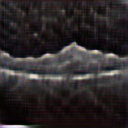

File: DME-8123126-4.jpeg Directory: train/DME Pixel size: (128, 128)


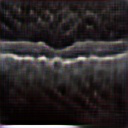

File: DRUSEN-5477211-4.jpeg Directory: train/DRUSEN Pixel size: (128, 128)


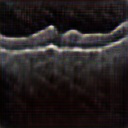

File: DRUSEN-732516-44.jpeg Directory: train/DRUSEN Pixel size: (128, 128)


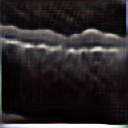

File: DRUSEN-8649762-14.jpeg Directory: train/DRUSEN Pixel size: (128, 128)


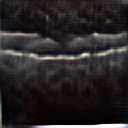

File: DRUSEN-2407494-15.jpeg Directory: train/DRUSEN Pixel size: (128, 128)


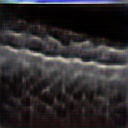

File: DRUSEN-3571629-5.jpeg Directory: train/DRUSEN Pixel size: (128, 128)


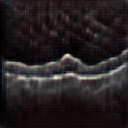

File: DME-30521-68.jpeg Directory: test/DME Pixel size: (128, 128)


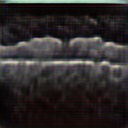

File: DME-258763-25.jpeg Directory: test/DME Pixel size: (128, 128)


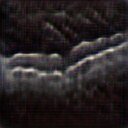

File: DME-30521-231.jpeg Directory: test/DME Pixel size: (128, 128)


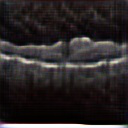

File: DME-119840-1.jpeg Directory: test/DME Pixel size: (128, 128)


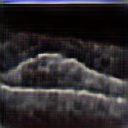

File: DME-258763-60.jpeg Directory: test/DME Pixel size: (128, 128)


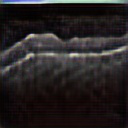

File: DRUSEN-142234-5.jpeg Directory: test/DRUSEN Pixel size: (128, 128)


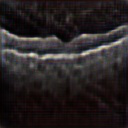

File: DRUSEN-364469-49.jpeg Directory: test/DRUSEN Pixel size: (128, 128)


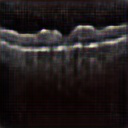

File: DRUSEN-228939-12.jpeg Directory: test/DRUSEN Pixel size: (128, 128)


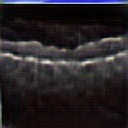

File: DRUSEN-224974-3.jpeg Directory: test/DRUSEN Pixel size: (128, 128)


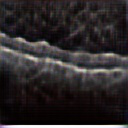

File: DRUSEN-95633-17.jpeg Directory: test/DRUSEN Pixel size: (128, 128)


In [1]:
import os
import random
from PIL import Image
from IPython.display import display

# Set the path to the directory
dir_path = "/home/jsmith/Desktop/JohnSmith_AssignmentMidtermProject/Data/Upsized_128x128x3/"

# Define the subdirectories
subdirs = ["train/DME", "train/DRUSEN", "test/DME", "test/DRUSEN"]

# Iterate over the subdirectories and select 10 random images
for subdir in subdirs:
    subdir_path = os.path.join(dir_path, subdir)
    files = os.listdir(subdir_path)
    sample_files = random.sample(files, 5)

    # Load and show the images
    for file in sample_files:
        file_path = os.path.join(subdir_path, file)
        image = Image.open(file_path)
        display(image)
        pixel_size = image.size
        print("File:", file, "Directory:", subdir, "Pixel size:", pixel_size)

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from tensorflow.keras import optimizers

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
optimizer  = optimizers.Adam(lr=0.00005)


# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model and add the top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
predictions = Dense(num_classes, activation='softmax')
model.add(predictions) # Add predictions layer to the model


# Train top layer
for layer in base_model.layers:
    layer.trainable = False
    
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
from tensorflow import keras
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)]
    
# Print the model summary
model.summary()

# Train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=50, validation_data=(val_data, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2023-03-22 19:00:18.007373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 19:00:18.011644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 19:00:18.011752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 19:00:18.012356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 15,763,650
Trainable params: 1,048,962
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50


2023-03-22 19:00:20.040560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-22 19:00:21.209287: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-22 19:00:21.209335: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-22 19:00:21.209349: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

335/335 [==============================] - 31s 77ms/step - loss: 0.9613 - accuracy: 0.6583 - val_loss: 0.5262 - val_accuracy: 0.7328
Epoch 2/50
335/335 [==============================] - 22s 66ms/step - loss: 0.5408 - accuracy: 0.7203 - val_loss: 0.4899 - val_accuracy: 0.7706
Epoch 3/50
335/335 [==============================] - 22s 66ms/step - loss: 0.5006 - accuracy: 0.7494 - val_loss: 0.4664 - val_accuracy: 0.7709
Epoch 4/50
335/335 [==============================] - 22s 67ms/step - loss: 0.4738 - accuracy: 0.7618 - val_loss: 0.4598 - val_accuracy: 0.7754
Epoch 5/50
335/335 [==============================] - 22s 67ms/step - loss: 0.4530 - accuracy: 0.7718 - val_loss: 0.4638 - val_accuracy: 0.7649
Epoch 6/50
335/335 [==============================] - 22s 67ms/step - loss: 0.4343 - accuracy: 0.7860 - val_loss: 0.4352 - val_accuracy: 0.7922
Epoch 7/50
335/335 [==============================] - 22s 67ms/step - loss: 0.4184 - accuracy: 0.7916 - val_loss: 0.4279 - val_accuracy: 0.7922
Epo

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_model_results(model, history, test_data, test_labels):
    # Plot accuracy and loss curves
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Val'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Val'], loc='upper left')

    plt.show()

    # Generate predictions for the test data
    y_pred = np.argmax(model.predict(test_data), axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    classes = np.arange(len(np.unique(y_true)))
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True Label',
           xlabel='Predicted Label')
    plt.setp(ax.get_xticklabels(),
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    plt.show()

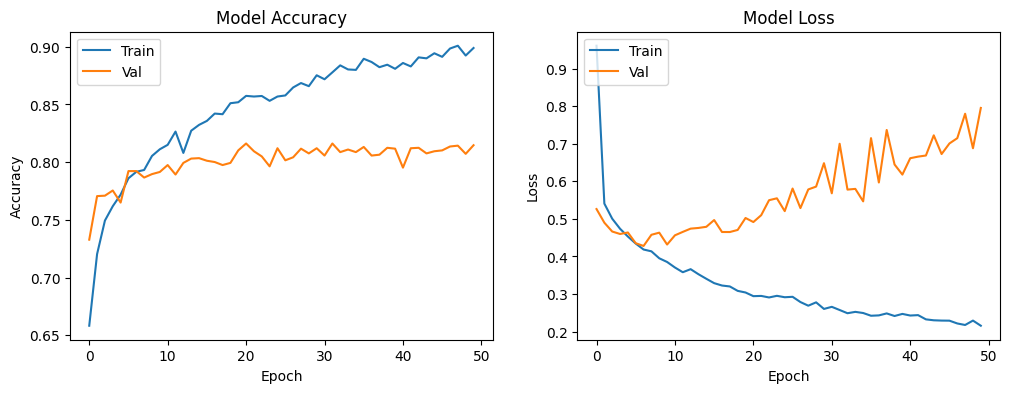

30/30 [==============================] - 2s 51ms/step


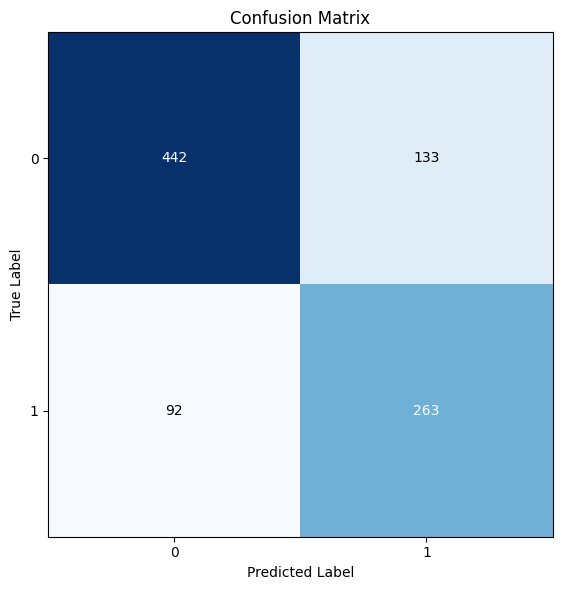

In [10]:
# Plot the model from HW1 with the original results
plot_model_results(model, history, test_data, test_labels)

The following charts are the output from Assignment2 which used the 128x128x3 original images for comparison. From the outputs of both assignments, we can see that, while decently close, the original images outperform the generated 128x128x3 images; specifically when it comes to validation loss. The generated images seem to be overfitting by a large marginto the point of increasing. This can be due to running 150 epochs vs the original 500 epochs which would have prodused a substantially better model. An additional note, I did not rename the model when copying the below model so, if the notebook is re-ran in its entirety, the Assignment2 model below will be overridden with the original model. But, will still be available above in the first few cells. 

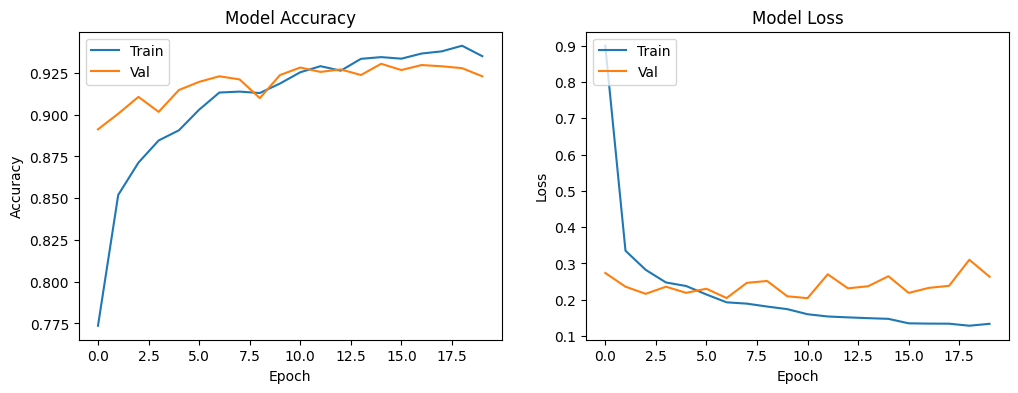

30/30 [==============================] - 1s 51ms/step


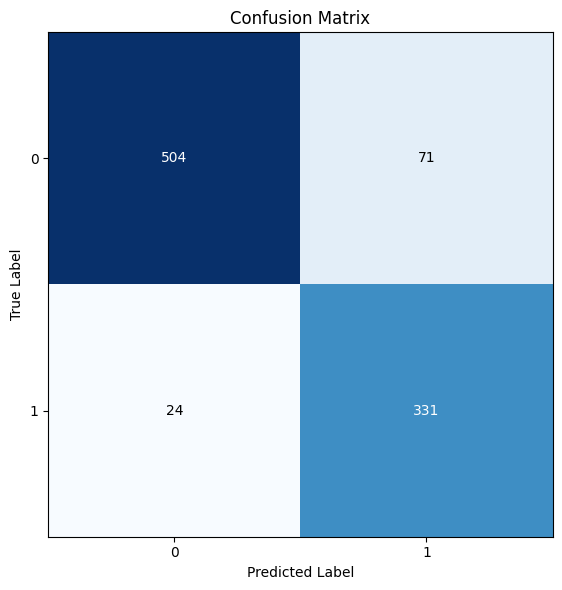

In [18]:
# Plot the model from HW1 with the original results
plot_model_results(model, history, test_data, test_labels)